# Background plots for FRETBursts paper

*This notebook generates the background plots (Fig. 2 & 3) for the paper:*

<br>
<div class="alert alert-success">
<b>FRETBursts: Open Source Burst Analysis Toolkit for Confocal Single-Molecule FRET</b><br>
Ingargiola et al. (2016). biorXiv doi:<a href="http://dx.doi.org/10.1101/039198" target="_blank">10.1101/039198</a>
</div>

> The main notebook is: [FRETBursts Paper Main Notebook](FRETBursts Paper Main Notebook.ipynb)

# Loading software

Load software and define default figure style.

In [1]:
from fretbursts import *

 - Optimized (cython) burst search loaded.
 - Optimized (cython) photon counting loaded.
--------------------------------------------------------------
 You are running FRETBursts (version 0.5.5).

 If you use this software please cite the following paper:

   FRETBursts: An Open Source Toolkit for Analysis of Freely-Diffusing Single-Molecule FRET
   Ingargiola et al. (2016). http://dx.doi.org/10.1101/039198 

--------------------------------------------------------------


In [2]:
sns = init_notebook(fs=13, savefig_dpi=75)

In [3]:
figure_size = (5, 4)
default_figure = lambda: plt.subplots(figsize=figure_size)
save_figures = True

def savefig(filename, **kwargs):
    if not save_figures:
        return
    import os
    name, extension = os.path.splitext(os.path.basename(filename))
    dir_ = '../figures/%s/' % name
    kwargs_ = dict(dpi=150, bbox_inches='tight', 
                   frameon=True, facecolor='white', transparent=False)
    kwargs_.update(kwargs)
    plt.savefig(dir_ + name + extension, **kwargs_)

# Getting the data

In [4]:
url = 'http://files.figshare.com/4917442/0023uLRpitc_NTP_20dT_0.5GndCl.hdf5'
download_file(url, save_dir='./data')

URL:  http://files.figshare.com/4917442/0023uLRpitc_NTP_20dT_0.5GndCl.hdf5
File: 0023uLRpitc_NTP_20dT_0.5GndCl.hdf5
 
File already on disk: /Users/anto/src/fretbursts_paper/notebooks/data/0023uLRpitc_NTP_20dT_0.5GndCl.hdf5 
Delete it to re-download.


In [5]:
filename = './data/' + url.split('/')[-1]
filename

'./data/0023uLRpitc_NTP_20dT_0.5GndCl.hdf5'

In [6]:
url2 = 'http://files.figshare.com/4861018/004_dsDNA_17d_green100u_red40u.hdf5'
download_file(url2, save_dir='./data')

URL:  http://files.figshare.com/4861018/004_dsDNA_17d_green100u_red40u.hdf5
File: 004_dsDNA_17d_green100u_red40u.hdf5
 
File already on disk: /Users/anto/src/fretbursts_paper/notebooks/data/004_dsDNA_17d_green100u_red40u.hdf5 
Delete it to re-download.


In [7]:
filename2 = './data/' + url2.split('/')[-1]
filename2

'./data/004_dsDNA_17d_green100u_red40u.hdf5'

# Loading the Data

#donor: 721537  #acceptor: 1537985 



data_0023uLRpitc_NTP_20dT_0.5GndCl G1.000

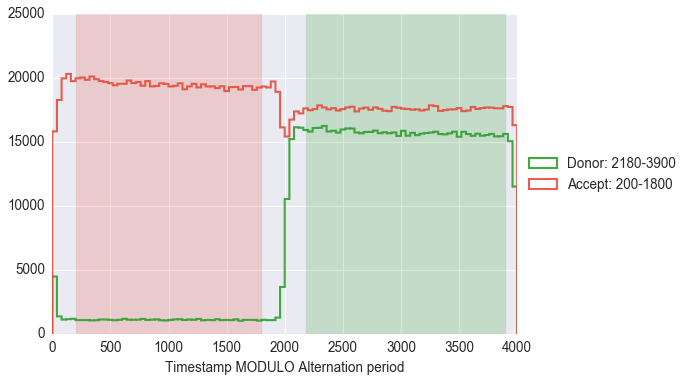

In [8]:
d = loader.photon_hdf5(filename)
bpl.plot_alternation_hist(d)
loader.usalex_apply_period(d)

#donor: 764963  #acceptor: 1717128 



data_004_dsDNA_17d_green100u_red40u G1.000

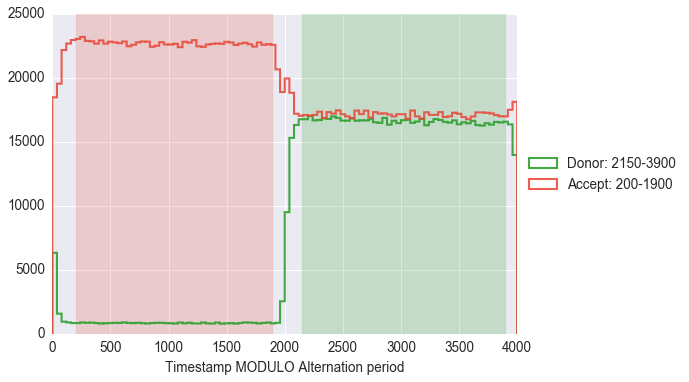

In [9]:
dv = loader.photon_hdf5(filename2)
bpl.plot_alternation_hist(dv)
loader.usalex_apply_period(dv)

## Background Estimation

Background estimation automatic threshold and a background period of 20s:

In [10]:
d.calc_bg(bg.exp_fit, time_s=20, tail_min_us='auto', F_bg=1.7)
dv.calc_bg(bg.exp_fit, time_s=20, tail_min_us='auto', F_bg=1.7)

 - Calculating BG rates ... [DONE]
 - Calculating BG rates ... [DONE]


> For more info see [Background estimation](http://nbviewer.jupyter.org/github/tritemio/FRETBursts_notebooks/blob/master/notebooks/FRETBursts%20-%20us-ALEX%20smFRET%20burst%20analysis.ipynb#Background-estimation) in the us-ALEX tutorial.

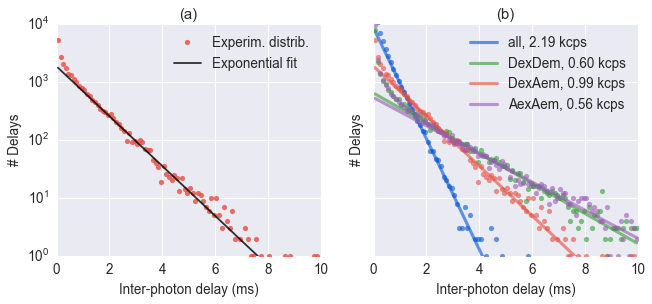

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(figure_size[0]*2, figure_size[1]), sharey=True)

dplot(d, hist_bg_single, tmax=20e-3, ph_sel=Ph_sel(Dex='Aem'), ax=ax[0],
      plot_style=dict(alpha=0.8),
      fit_style=dict(color='k'))
ax[0].legend(['Experim. distrib.', 'Exponential fit'])

dplot(d, hist_bg, ax=ax[1], 
      fit_style=dict(lw=3),
      plot_style=dict(label=None))
#plt.legend(bbox_to_anchor=(1.04, 0.9), loc=2, fontsize=12)
ax[0].set_title('(a)')
ax[1].set_title('(b)')
savefig('ph_delays_distrib_all.png')

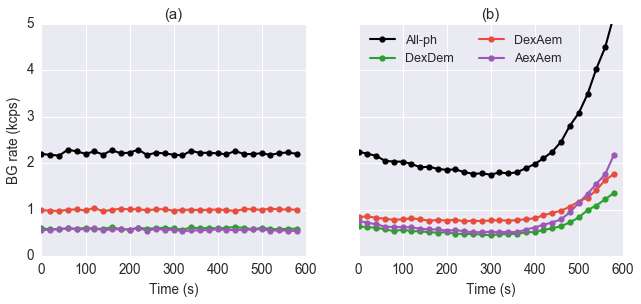

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(figure_size[0]*2, figure_size[1]), sharey=True)

dplot(d, timetrace_bg, ax=ax[0])
dplot(dv, timetrace_bg, ax=ax[1])

plt.legend(['All-ph', 'DexDem', 'DexAem', 'AexAem'],
           #bbox_to_anchor=(1.04, 0.9), 
           ncol=2, loc='upper left', fontsize=12)

ax[0].legend([])
ax[0].set_ylim(0, 5)
ax[1].set_ylabel('')
ax[0].set_title('(a)')
ax[1].set_title('(b)')
savefig('background_timetrace')